In [67]:
%matplotlib inline

In [68]:
import os
import numpy as np

In [69]:
import matplotlib.pyplot as plt

In [70]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [71]:
from PyQt4 import QtGui

In [72]:
import pyfits

## Select the working folder

In [73]:
%gui qt

In [74]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None, message=None):
    """Select a directory
    """
    if dir is None: dir ='../'
    if message is None: message = 'Select Folder ...'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, message,
                                                      dir,
                                                      QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [75]:
%gui qt
data_folder = gui_fname()
%matplotlib inline

In [95]:
# remove hidden file .DS_Store 
ds_file = os.path.join(data_folder, ".DS_Store")
try:
    os.remove(ds_file)
except:
    pass

In [96]:
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)
print('Folder contains %d files.' %number_of_files)

Folder contains 967 files.


In [97]:
image_file_0 = os.path.join(data_folder, list_of_files[0])

In [98]:
print("Does this file exist: " ,os.path.isfile(image_file_0))

Does this file exist:  True


## Select Cropp|ing Region

### Images are displayed one at a time

In [99]:
print(image_file_0)
o_fits = pyfits.open(image_file_0)
o_fits_0 = o_fits[0]
data = o_fits_0.data
height, width = data.shape

/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_0.fits


In [101]:
def plot_image_with_crop_region(file_index, x_left, x_right, y_top, y_bottom):

    image_file = os.path.join(data_folder, list_of_files[file_index])
    print(image_file)
    o_fits = pyfits.open(image_file)
    o_fits_0 = o_fits[0]
    data = o_fits_0.data
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis')
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)   
    
    return [x_left, x_right, y_top, y_bottom]

/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_165.fits


[282, 422, 0, 254]

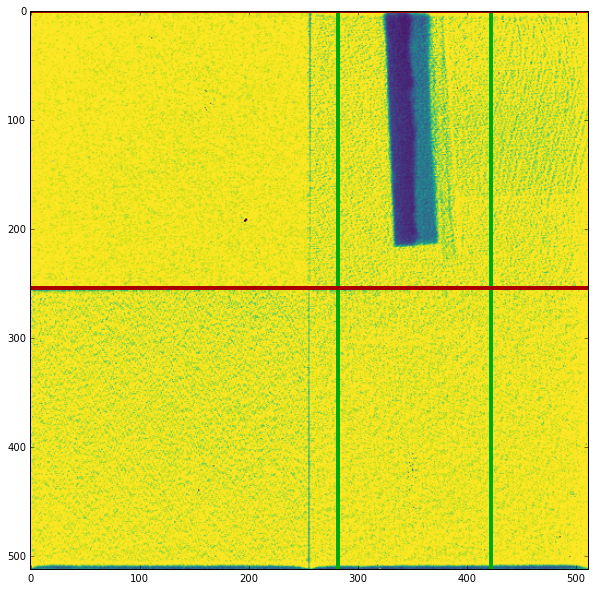

In [102]:
crop = interact(plot_image_with_crop_region, 
        file_index =widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Image index'),
        x_left = widgets.IntSlider(min=0, max=width-1, step=1, value=0),
        x_right = widgets.IntSlider(min=0, max=width-1, step=1, value=width-1),
        y_top = widgets.IntSlider(min=0, max=height-1, step=1, value=0), 
        y_bottom = widgets.IntSlider(min=0, max=height-1, step=1, value=height-1))

## Display Test Crop Images

To make sure the cropping is correct

In [103]:
[x_left, x_right, y_top, y_bottom] = crop.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

Region Selected:
  left : 282
  right: 422
    top: 0
 bottom: 254


In [104]:
def test_plot_image_cropped(file_index):

    image_file = os.path.join(data_folder, list_of_files[file_index])
    o_fits = pyfits.open(image_file)
    o_fits_0 = o_fits[0]
    data = o_fits_0.data
    
    data_cropped = data[y_top: y_bottom, x_left: x_right]
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data_cropped, cmap='viridis')

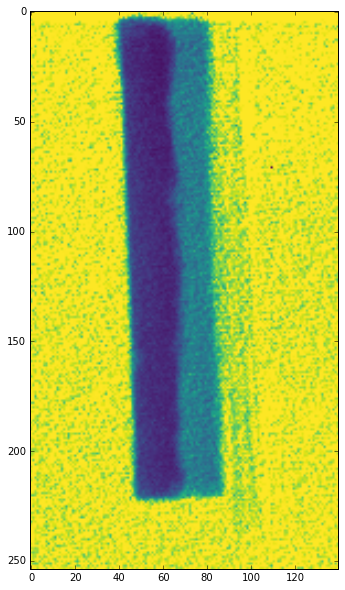

In [105]:
crop = interact(test_plot_image_cropped, 
        file_index =widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Image index'))


## Cropp all Images Selected and Save Images into Tiff Files

In [106]:
from PIL import Image
import numpy as np

In [107]:
%gui qt
output_folder = gui_fname()
%matplotlib inline

In [112]:
# remove hidden file .DS_Store 
ds_file = os.path.join(output_folder, ".DS_Store")
try:
    os.remove(ds_file)
except:
    pass

In [109]:
from PIL import Image

In [110]:
progress_bar = widgets.IntProgress()
progress_bar.max = number_of_files
display(progress_bar)

for index, file_name in enumerate(list_of_files):
        o_fits = pyfits.open(os.path.join(data_folder, list_of_files[index]))
        o_fits_0 = o_fits[0]
        _data = o_fits_0.data
        data_cropped = _data[y_top: y_bottom, x_left: x_right]
        new_image = Image.fromarray(np.float32(data_cropped))
        file_name = 'image_%s.tiff' %index
        output_file_name = os.path.join(output_folder, file_name)
        new_image.save(output_file_name)
        progress_bar.value = index+1

### Checking that all the files have been created !!!

In [113]:
list_input_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_input_files = len(list_input_files)
print("Input Folder contains %d files" %number_of_input_files)

list_output_files = [name for name in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, name))]
number_of_output_files = len(list_output_files)
print("Output Folder contains %d files" % number_of_output_files)



Input Folder contains 967 files
Output Folder contains 967 files
